<a href="https://colab.research.google.com/github/cmannnn/workhuman_data_analytic_canidate_exercise/blob/main/workhuman_data_analytic_canidate_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workhuman Data Analytic Canidate Exercise**


# **Key Fields**

*   visitId – this is the unique random identifier assigned by Google to each visit
*   fullVisitorId – this is the unique random identifier assigned by Google to each distinct user
*   hits.type – denotes the category of the hit (pageview, event, transaction, etc)
*   hits.page.pagePath – the URL pathname of the page where the hit occurred
hits.eventInfo. (columns AQ-AS) – this is the custom taxonomy for non-pageload interactions
*   trafficsource. (columns J-N) – these are UTM attributes about the referrer of the visit
*   device. (columns O-R) – these are technology attributes about the user
geoNetwork. (columns S-V) – these are location attributes about the user








# **Business KPIs**


*   Prospect conversion rate – the percent of first-time visitors with a transaction, excluding any returning customers
*   Channel revenue contribution – how much revenue is attributed to each acquisition channel
*   Gross margin – the percent of all e-commerce revenue – cost of goods sold out of total revenue








# **Business Questions**

*   What is the best way to segment Google organic search traffic, and why?
*   Which entry page(s) would be a good place to focus on optimizing and why?
*   What is the best way to measure how many transactions were completed and conversion rate, and why?
*   Which continent has the highest add-to-cart rate on mobile?
*   Given the above business KPIs, please provide 3 suggestions for additional data to be captured in Google Analytics to make this dataset more useful.

#Imports

In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!python '/content/drive/MyDrive/Colabby Krabby Paddy/workhuman_data_analytic_canidate_exercise/setup_py.py' install

In [3]:
# imports
!pip install openpyxl==3.0.0
!pip install pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

     |████████████████████████████████| 172 kB 4.2 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=992b0ad728fc4d7fd75f6004377e43973af9acfdba5b8d78caa78e229887f653
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [4]:
# setting path variable
path = '/content/drive/MyDrive/Colabby Krabby Paddy/workhuman_data_analytic_canidate_exercise/da_google_analytics_sample.xlsx'

In [5]:
# reading in the pathand setting the index column to 'visitId'
df = pd.read_excel(path, index_col = 'visitId', engine = 'openpyxl')

In [6]:
# dropping unecesary columns
cols_to_drop = ['trafficSource.campaignCode', 'hits.transaction.transactionCoupon', 'hits.eventInfo.eventValue', 'userId']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [7]:
# changing the date column to datetime
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

In [8]:
# changing transaction recenue column to regular price
df['hits.transaction.transactionRevenue'] = df['hits.transaction.transactionRevenue'] * .000001

# Current

In [9]:
# grouping dataset by visitId to see unique visitors
df_grouped = df.groupby(df.index).sum()

In [10]:
# non unique device browser
df['device.browser'].value_counts()

Chrome                      7590
Safari                       950
Firefox                      440
Edge                         300
Internet Explorer            153
Android Webview              128
Opera Mini                    78
Safari (in-app)               47
UC Browser                    13
Opera                          8
YaBrowser                      4
Amazon Silk                    3
Android Browser                2
Coc Coc                        2
Nokia Browser                  1
Mozilla Compatible Agent       1
Name: device.browser, dtype: int64

[]

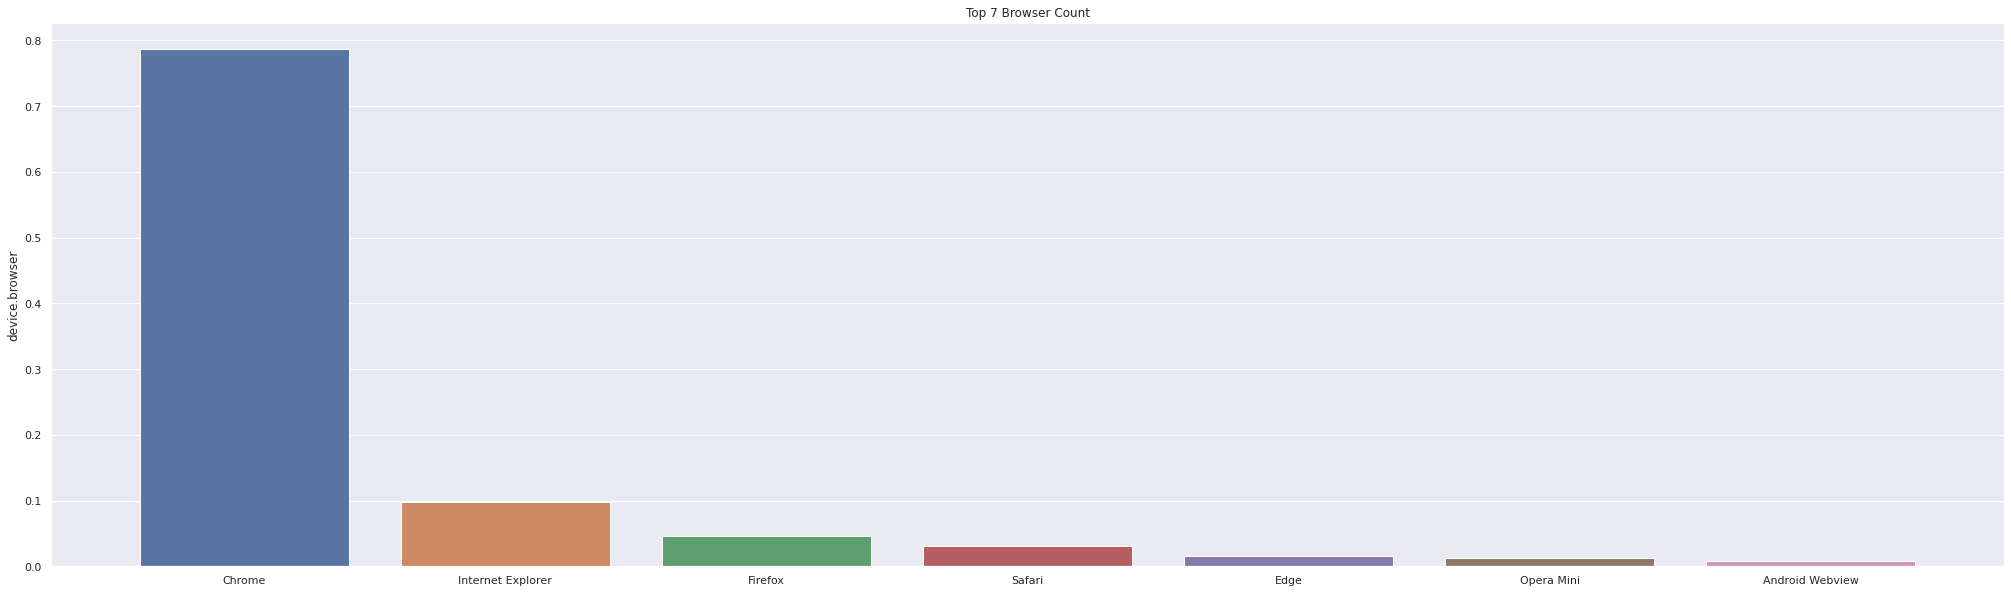

In [11]:
# browser count
ax, fig = plt.subplots(figsize = (35,10))
ax = sns.barplot(x = df['device.browser'].unique()[:7], y = df['device.browser'].value_counts()[:7] / df['device.browser'].value_counts()[:7].sum())
plt.title('Top 7 Browser Count')
plt.plot()

In [12]:
# non-unique devices count
df['device.deviceCategory'].value_counts()

desktop    7753
mobile     1784
tablet      183
Name: device.deviceCategory, dtype: int64

[]

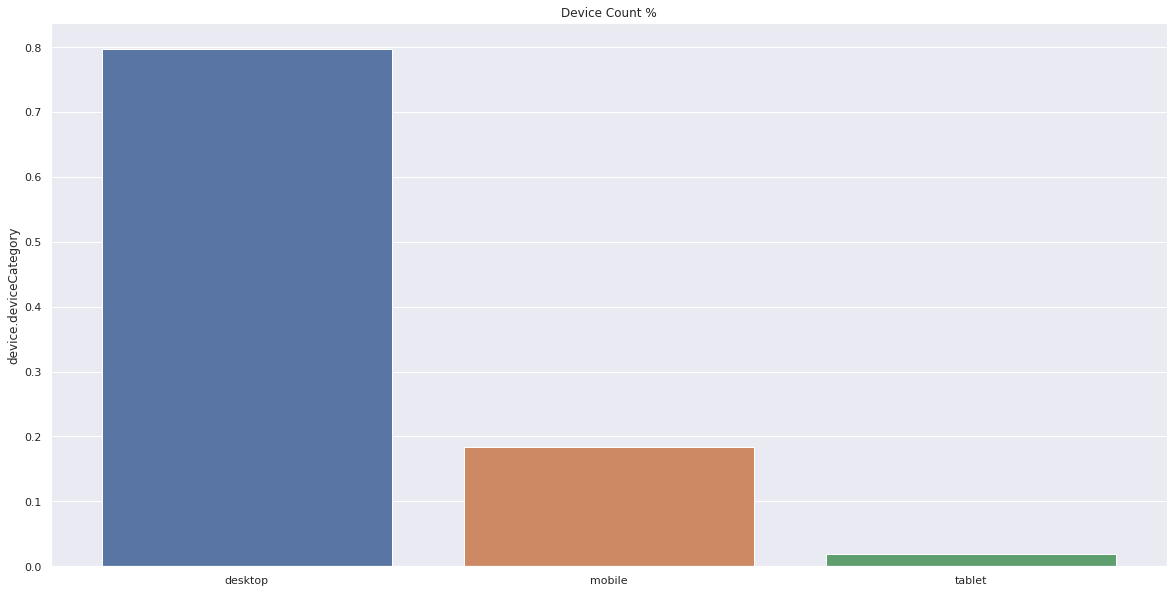

In [13]:
# device category count	
ax, fig = plt.subplots(figsize = (20,10))
sns.barplot(x = df['device.deviceCategory'].unique(), y = df['device.deviceCategory'].value_counts() / df['device.deviceCategory'].value_counts().sum())
plt.title('Device Count %')
plt.plot()

In [14]:
# which channel users used to access site
df['channelGrouping'].value_counts()

Organic Search    5013
Referral          1932
Direct            1421
Social             938
Paid Search        217
Affiliates         127
Display             72
Name: channelGrouping, dtype: int64

In [15]:
# counting mobile vs non mobile users
df['device.isMobile'].value_counts()

False    7753
True     1967
Name: device.isMobile, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

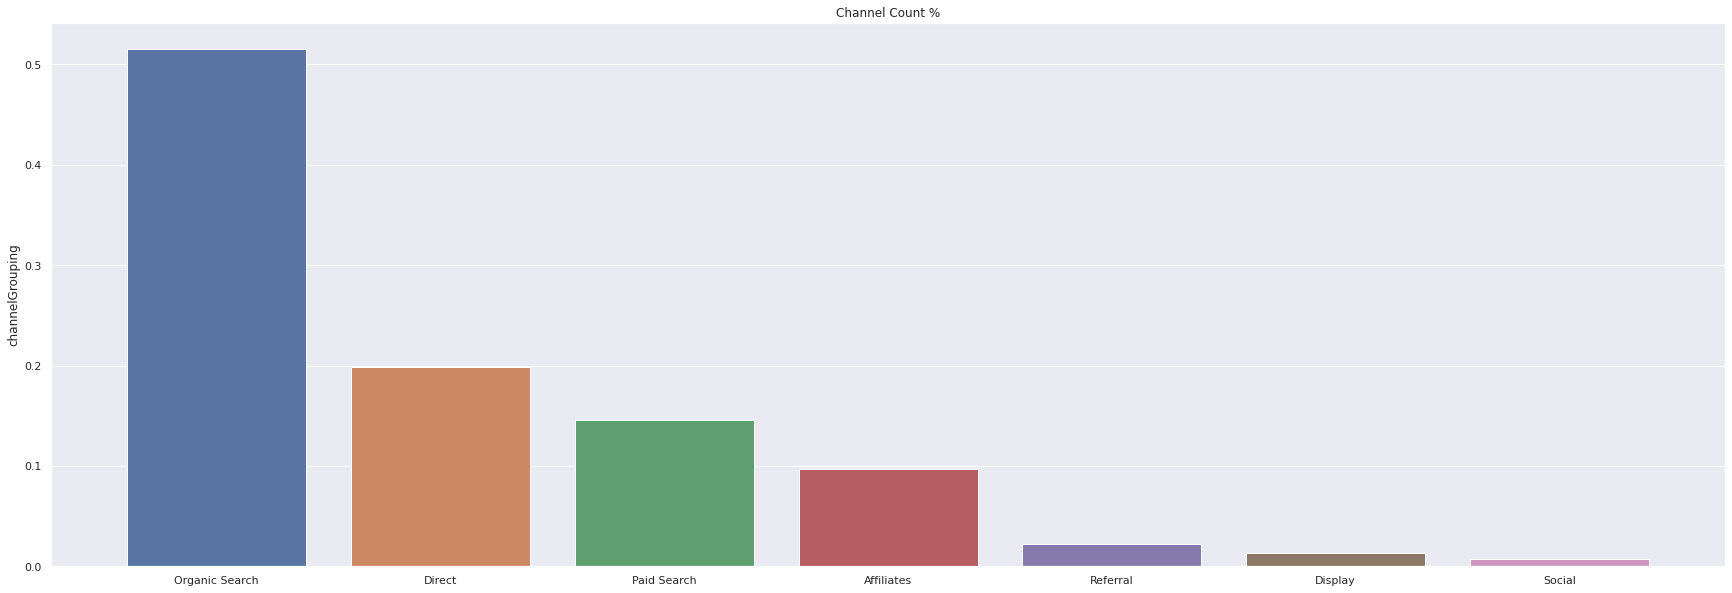

In [16]:
# channel count graph
ax, fig = plt.subplots(figsize = (30,10))
sns.barplot(df['channelGrouping'].unique(), df['channelGrouping'].value_counts() / df['channelGrouping'].value_counts().sum())
plt.title('Channel Count %')
plt.plot()

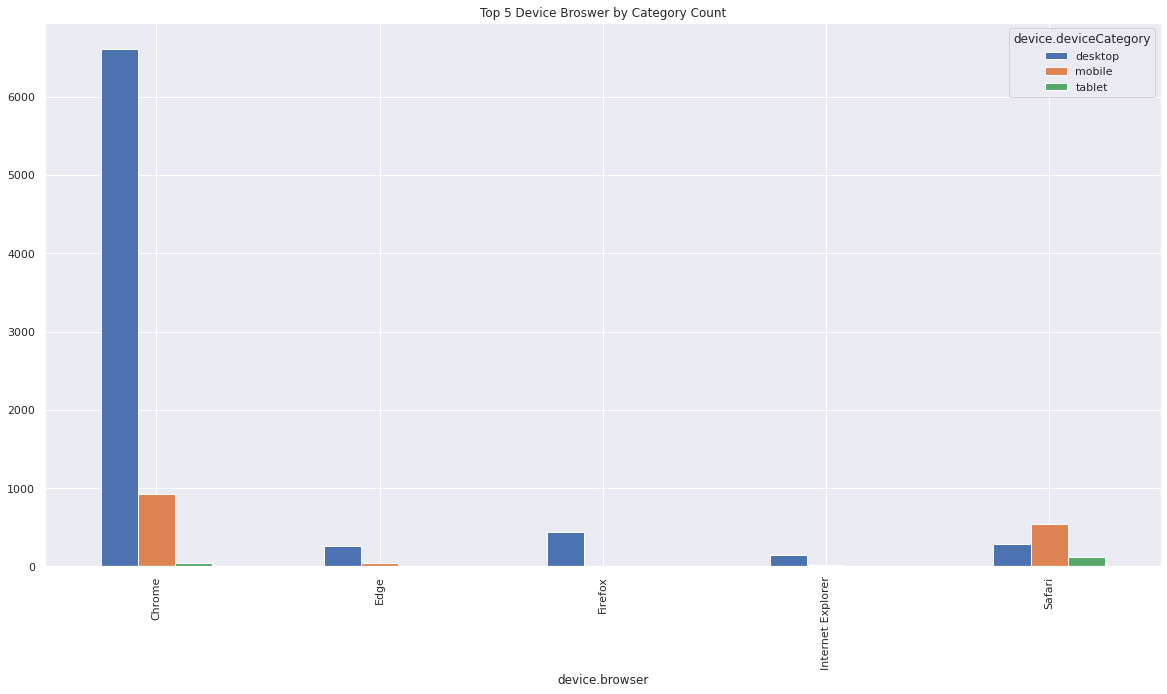

In [17]:
# top 5 browser grouping by device
browser_list = ['Chrome', 'Edge', 'Firefox', 'Internet Explorer', 'Safari']
browser_top_five = df[df['device.browser'].isin(browser_list)]

channel_mobile_group = browser_top_five.groupby(['device.browser', 'device.deviceCategory'])
channel_mobile_group_count = channel_mobile_group['device.browser'].count()
channel_mobile_group_count.unstack().plot.bar(figsize = (20, 10), title = 'Top 5 Device Broswer by Category Count')

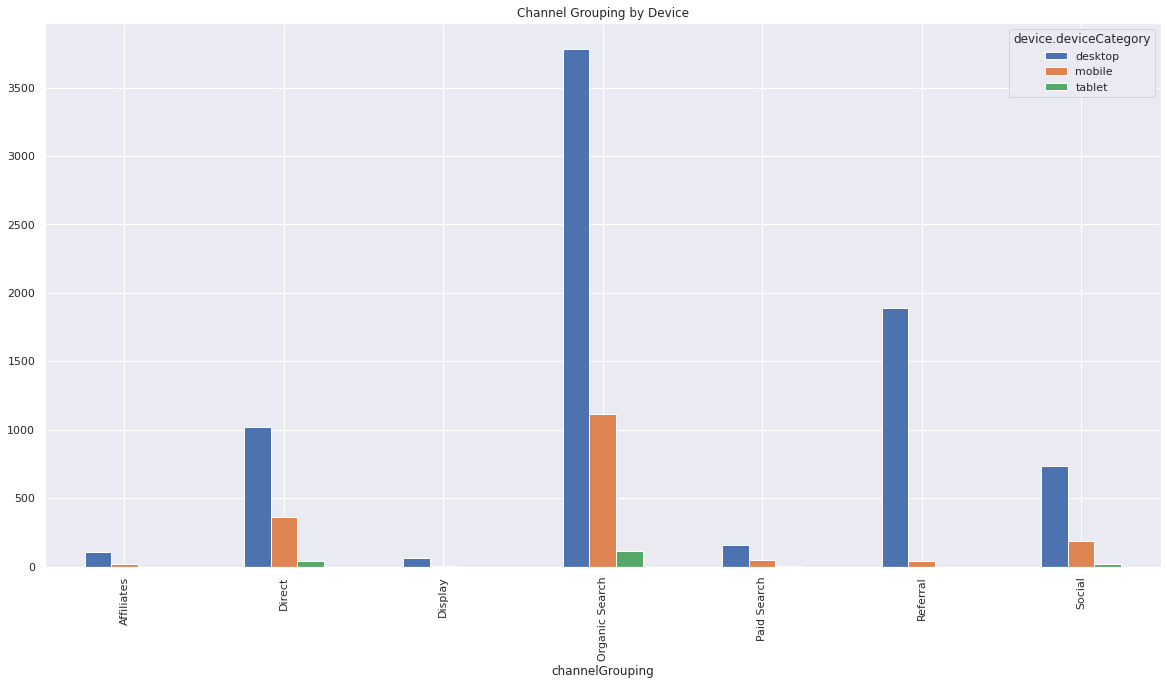

In [18]:
# channel grouping by device category
device_category_mobile_group = df.groupby(['channelGrouping', 'device.deviceCategory'])
device_category_mobile_group_count = device_category_mobile_group['channelGrouping'].count()
device_category_mobile_group_count.unstack().plot.bar(figsize = (20, 10), title = 'Channel Grouping by Device')

#1. What is the best way to segment Google organic search traffic, and why?

In [19]:
# count of channels
df['channelGrouping'].value_counts()

Organic Search    5013
Referral          1932
Direct            1421
Social             938
Paid Search        217
Affiliates         127
Display             72
Name: channelGrouping, dtype: int64

In [20]:
# count of traffic source
df['trafficSource.source'].value_counts()

google                     5119
(direct)                   2891
youtube.com                 623
l.facebook.com              230
analytics.google.com        170
Partners                    127
google.com                  111
dfa                          72
bing                         68
mail.google.com              43
sites.google.com             36
siliconvalley.about.com      35
sashihara.jp                 31
yahoo                        24
m.facebook.com               22
reddit.com                   21
t.co                         18
baidu                        13
groups.google.com            10
qiita.com                     8
facebook.com                  8
docs.google.com               8
blog.golang.org               7
quora.com                     6
ask                           6
businessinsider.com           5
google.nl                     2
google.co.jp                  2
web.skype.com                 1
google.co.uk                  1
google.co.th                  1
blognone

In [21]:
# google organic search grouped by country 
# channelgrouping = 'organic search' & traffic source = 'google'
google_organic_traffic = df[(df['channelGrouping'] == 'Organic Search') & (df['trafficSource.source'] == 'google')]
google_organic_traffic_by_country = google_organic_traffic.groupby(['geoNetwork.ountry']).count()
google_organic_traffic_by_country.head()

,visitNumber,visitStartTime,date,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.networkDomain,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isInteraction,hits.isEntrance,hits.isExit,hits.referer,hits.page.pagePath,hits.page.hostname,hits.page.pageTitle,hits.page.pagePathLevel1,hits.page.pagePathLevel2,hits.page.pagePathLevel3,hits.page.pagePathLevel4,hits.transaction.transactionId,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eventInfo.eventCategory,hits.eventInfo.eventAction,hits.eventInfo.eventLabel,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.eCommerceAction.option,hits.type,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime,fullVisitorID,channelGrouping
geoNetwork.ountry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(not set),9,9,9,9,9,9,7,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,3,3,3,9,9,9,9,8,8,4,0,0,0,0,0,0,0,9,9,0,9,0,0,0,9,9
Albania,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,0,0,0,0,0,0,0,0,2,2,0,2,0,0,0,2,2
Argentina,10,10,10,10,10,10,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,3,3,3,10,10,10,10,3,3,0,0,0,0,0,0,0,0,10,10,0,10,0,0,0,10,10
Australia,31,31,31,31,31,31,21,15,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,15,15,20,31,31,31,31,11,10,0,0,0,0,0,0,0,0,31,31,0,31,0,0,0,31,31
Austria,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,3,3,0,3,0,0,0,3,3


The best way to segment the Google organic search traffic is by country. Segmenting by country allows for the most specific geographic targeting from the available data. SEO must be adapted for different countries due to the difference in language, culture, religion, region, etc. Geographic considerations must be taken into account when optimizing SEO.  

Country specific segmentation can also uncover the origin of hits, visits, and/or pageviews that can be focused on in an upcoming campaign, for example.

#2. Which entry page(s) would be a good place to focus on optimizing and why?

In [22]:
# many different entry pages containing 'google'
# could join to see total 'google' hits
df['trafficSource.source'][df['trafficSource.source'].str.contains('google')].value_counts()

google                  5119
analytics.google.com     170
google.com               111
mail.google.com           43
sites.google.com          36
groups.google.com         10
docs.google.com            8
google.co.jp               2
google.nl                  2
google.co.th               1
google.co.uk               1
Name: trafficSource.source, dtype: int64

In [23]:
# top 7 traffic sources
df['trafficSource.source'].value_counts().iloc[:7]

google                  5119
(direct)                2891
youtube.com              623
l.facebook.com           230
analytics.google.com     170
Partners                 127
google.com               111
Name: trafficSource.source, dtype: int64

In [24]:
# percentage of top 7 traffic sources
df['trafficSource.source'].value_counts().iloc[:7] / df['trafficSource.source'].value_counts().iloc[:7].sum() * 100

google                  55.215187
(direct)                31.183260
youtube.com              6.719879
l.facebook.com           2.480854
analytics.google.com     1.833675
Partners                 1.369863
google.com               1.197282
Name: trafficSource.source, dtype: float64

[]

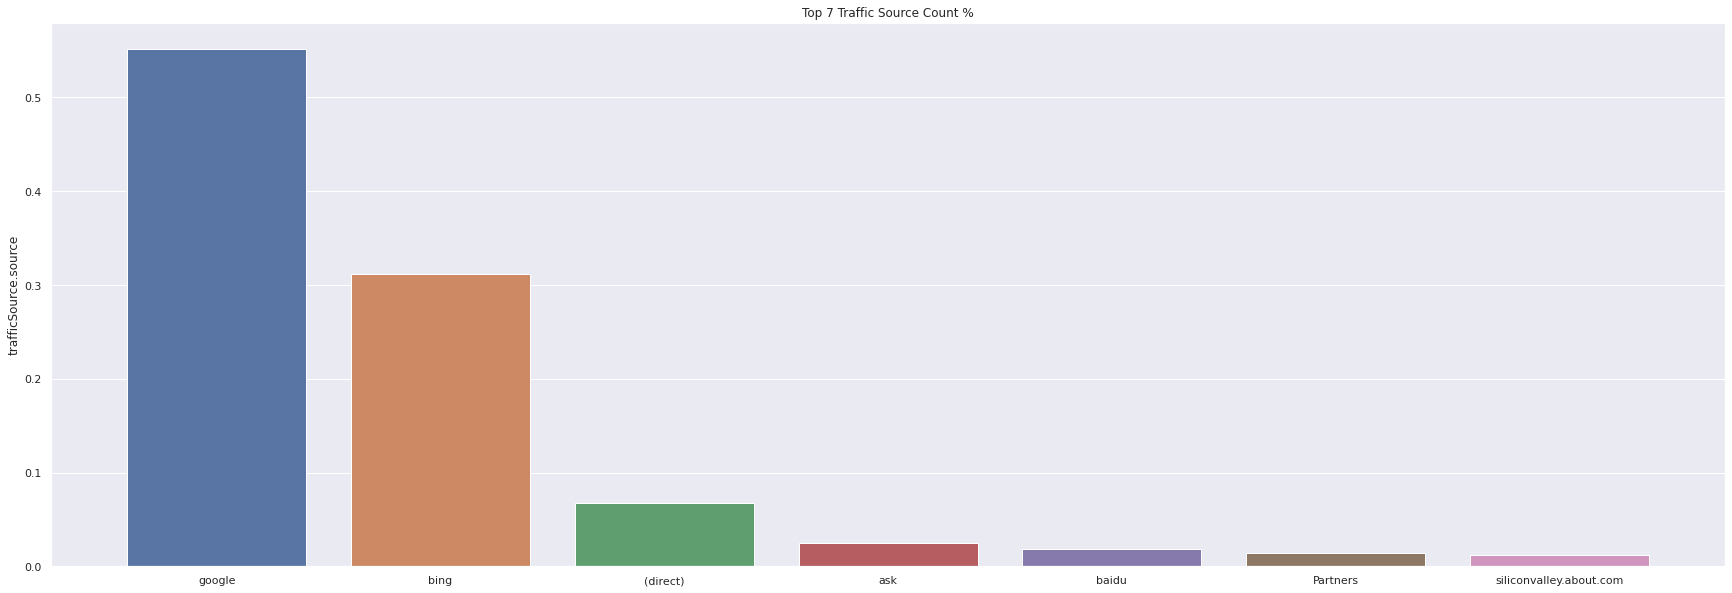

In [25]:
# top 7 traffic source count 
ax, fig = plt.subplots(figsize = (30,10))
sns.barplot(x = df['trafficSource.source'].unique()[:7], y = df['trafficSource.source'].value_counts().iloc[:7] / df['trafficSource.source'].value_counts().iloc[:7].sum())
plt.title('Top 7 Traffic Source Count %')
plt.plot()

The most important entry pages to optimize would be the top 7 'sources' of where the users are coming from. I used this information found in the **['trafficSource.source']** column. The ['trafficSource.source'] column is the name of the search engine, the hostname, or the utm_source (advertiser, site, publication, etc) where traffic is coming from. These are non-unique users.

From the table or graph, you can see that Google is an extremely important source of traffic which accounts for the majority and more than 55% of all traffic. Optimizing Google search tearms for this website is vital. 

Users coming directly to the site is also very important to consider, where more than 31%. This indicates that many people know or are familiar with this site. There is a large dropoff after the top two entry pages. The remaining five entry pages account for about 13.58% of non-unique traffic. These five are important to optimize, but shouldn't take presedence over Google or direct search optimizing strategies. 

# 3. What is the best way to measure how many transactions were completed and conversion rate, and why?

In [26]:
# filtering to where there is revenue recorded
df[df['hits.transaction.transactionRevenue'].notnull()].head(2)

,visitNumber,visitStartTime,date,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.ountry,geoNetwork.networkDomain,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isInteraction,hits.isEntrance,hits.isExit,hits.referer,hits.page.pagePath,hits.page.hostname,hits.page.pageTitle,hits.page.pagePathLevel1,hits.page.pagePathLevel2,hits.page.pagePathLevel3,hits.page.pagePathLevel4,hits.transaction.transactionId,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eventInfo.eventCategory,hits.eventInfo.eventAction,hits.eventInfo.eventLabel,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.eCommerceAction.option,hits.type,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime,fullVisitorID,channelGrouping
visitId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1489477049,4,1489477049,2017-03-14,1,9,9.0,156.0,NaN,(not set),google,organic,(not provided),Safari,iOS,True,mobile,Americas,Northern America,United States,(not set),8,156434,0,40,True,NaN,NaN,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,NaN,NaN,NaN,ORD201703141827,23.99,7340000.0,23360000.0,NaN,NaN,NaN,6,1,NaN,PAGE,NaN,NaN,NaN,7.328090e+18,Organic Search
1489529549,3,1489529549,2017-03-14,1,13,12.0,176.0,NaN,(not set),(direct),(none),NaN,Chrome,Windows,False,desktop,Americas,Northern America,United States,(not set),12,176132,15,15,True,NaN,NaN,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,NaN,NaN,NaN,ORD201703141957,20.99,6920000.0,11500000.0,NaN,NaN,NaN,6,1,NaN,PAGE,NaN,NaN,NaN,3.041140e+18,Referral


In [27]:
# transactions where revenue was recorded
transaction_count = df['hits.transaction.transactionRevenue'].count()
print(f'There were {transaction_count} recorded transactions on March 14, 2017')

There were 40 recorded transactions on March 14, 2017


In [28]:
# df_grouped['hits.transaction.transactionRevenue'].count()
df_grouped['hits.isExit'][df_grouped['hits.transaction.transactionRevenue'] != 0].count()

32

In [29]:
# conversion rate calculation
# sale conversions / # of total interactions
conversion_rate = df['hits.transaction.transactionRevenue'].count() / df['hits.transaction.transactionRevenue'].notnull().count() * 100
conversion_rate_unique = df_grouped['hits.isExit'][df_grouped['hits.transaction.transactionRevenue'] != 0].count() / df_grouped['hits.transaction.transactionRevenue'].count() * 100
print(f'The non-unique conversion rate on March 14, 2017 was: {conversion_rate}')
print(f'The unique conversion rate on March 14, 2017 was: {conversion_rate_unique}') 

The non-unique conversion rate on March 14, 2017 was: 0.411522633744856
The unique conversion rate on March 14, 2017 was: 1.3900955690703736


The best way to measure how many transactions were completed is to count the number of unique/non-unique transactions in the ['hits.transaction.transactionId] column. If you wanted to calculate the unique number of transactions, that can also be calculated by grouping the dataset on the ['visitId'] column so that users that for example, buy three items are only counted once.

#4. Which continent has the highest add-to-cart rate on mobile?

In [30]:
df['geoNetwork.continent'].head()

visitId
1489544305     Oceania
1489496466      Europe
1489517319        Asia
1489477788    Americas
1489485767      Europe
Name: geoNetwork.continent, dtype: object

In [47]:
mobile_item = df[df['device.deviceCategory'] == 'mobile']['device.isMobile'].count()

In [48]:
mobile_item

1784

In [68]:
mobile_item_added_to_cart = df[(df['device.deviceCategory'] == 'mobile') & (df['hits.eventInfo.eventAction'] == 'Add to Cart')]['device.isMobile'].count()
#['device.isMobile'].count()

In [69]:
mobile_item_added_to_cart

17

In [78]:
# total # of session where someone adds an item / total number of sessions
# assume still counting for mobile only
add_to_cart_total = mobile_item_added_to_cart / mobile_item * 100
print('The total add to cart calculation is:  %.3f' % add_to_cart_total)

The total add to cart calculation is:  0.953


In [58]:
continent_add_to_cart = mobile_item_added_to_cart.groupby(['geoNetwork.continent'])['totals.visits'].sum()

In [64]:
continent_add_to_cart

geoNetwork.continent
Africa       1
Americas    11
Asia         5
Name: totals.visits, dtype: int64

In [81]:
(continent_add_to_cart[0] / mobile_item) * 100

0.05605381165919283

In [83]:
# conversion rate by country
# assume still counting for mobile only
print('The African mobile only conversion rate is: %.3f' % (continent_add_to_cart[0] / mobile_item * 100)) # Africa
print('The Americas mobile only conversion rate is: %.3f' %  (continent_add_to_cart[1] / mobile_item * 100)) # Americas
print('The Asia mobile only conversion rate is: %.3f' % (continent_add_to_cart[2] / mobile_item * 100)) # Asia

The African mobile only conversion rate is: 0.056
The Americas mobile only conversion rate is: 0.617
The Asia mobile only conversion rate is: 0.280


#5.Given the above business KPIs, please provide 3 suggestions for additional data to be captured in Google Analytics to make this dataset more useful.

*   Prospect conversion rate – the percent of first-time visitors with a transaction, excluding any returning customers
*   Channel revenue contribution – how much revenue is attributed to each acquisition channel
*   Gross margin – the percent of all e-commerce revenue – cost of goods sold out of total revenue

